<a href="https://colab.research.google.com/github/flaviamvrocha/Cota-de-g-nero/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
pip install electionsBR

In [34]:
from scipy.stats import anderson
import scipy.stats as stats


In [4]:
from electionsBR.api import get_elections, get_candidates, get_coalitions, get_secretaries, get_assets, \
        get_votes

In [97]:
ver_08 = get_candidates(year=2008, position="Vereador", encoding='latin-1', sep=',')
ver_12 = get_candidates(year=2012, position="Vereador", encoding='latin-1', sep=';')

In [30]:
par_08 = get_elections(year=2008, position="Vereador", regional_aggregation="Micro", political_aggregation="Partido")
par_12 = get_elections(year=2012, position="Vereador", regional_aggregation="Micro", political_aggregation="Partido")

In [98]:
#Filtro por vereador e colunas que uso
f1 = ['VEREADOR']
f2 = ['DEFERIDO']
f3 = ['ELEITO POR QP', 'ELEITO POR MEDIA', 'ELEITO']
f3_1 = ['ELEITO POR QP', 'ELEITO POR MEDIA', 'ELEITO']
f4 = ['FEMININO']
f5 = ['MASCULINO']
colunasSelected = ['SIGLA_UF','SIGLA_UE','COD_MUN_IBGE', 'ANO_ELEICAO', 'DESCRICAO_UE','DES_SITUACAO_CANDIDATURA','SIGLA_PARTIDO','DESCRICAO_OCUPACAO','IDADE_DATA_ELEICAO', 'DESCRICAO_SEXO','DESCRICAO_GRAU_INSTRUCAO','DESCRICAO_ESTADO_CIVIL','DESCRICAO_COR_RACA','DESC_SIT_TOT_TURNO']

#filtragem
ver_08 = ver_08[ver_08['DESCRICAO_CARGO'].isin(f1)]
ver_12 = ver_12[ver_12['DESCRICAO_CARGO'].isin(f1)]
ver_08 = ver_08[ver_08['DES_SITUACAO_CANDIDATURA'].isin(f2)]
ver_12 = ver_12[ver_12['DES_SITUACAO_CANDIDATURA'].isin(f2)]
ver_08 = ver_08.filter(items=colunasSelected)
ver_12 = ver_12.filter(items=colunasSelected)
#POR SEXO
ver_08_F = ver_08[ver_08['DESCRICAO_SEXO'].isin(f4)]
ver_12_F = ver_12[ver_12['DESCRICAO_SEXO'].isin(f4)]


In [344]:
x = ver_08.groupby(['SIGLA_UF'])[['SIGLA_UF']].count()
y = ver_12.groupby(['SIGLA_UF'])[['SIGLA_UF']].count()
x.columns=['Total/Estado']
x.reset_index(inplace=True)
y.columns=['Total/Estado']
y.reset_index(inplace=True)

In [298]:
#graph
a = ver_08_F.groupby(['DESCRICAO_SEXO','SIGLA_UF'])[['DESCRICAO_SEXO']].count()
a.columns=['Candidatas']
a.reset_index(inplace=True)
a['Percentual'] = round((a['Candidatas']/x['Total/Estado'])*100, ndigits=1)


In [346]:
b = ver_12_F.groupby(['DESCRICAO_SEXO','SIGLA_UF'])[['DESCRICAO_SEXO']].count()
b.columns=['Candidatas']
b.reset_index(inplace=True)
b['Percentual'] = round((b['Candidatas']/y['Total/Estado'])*100, ndigits=1)

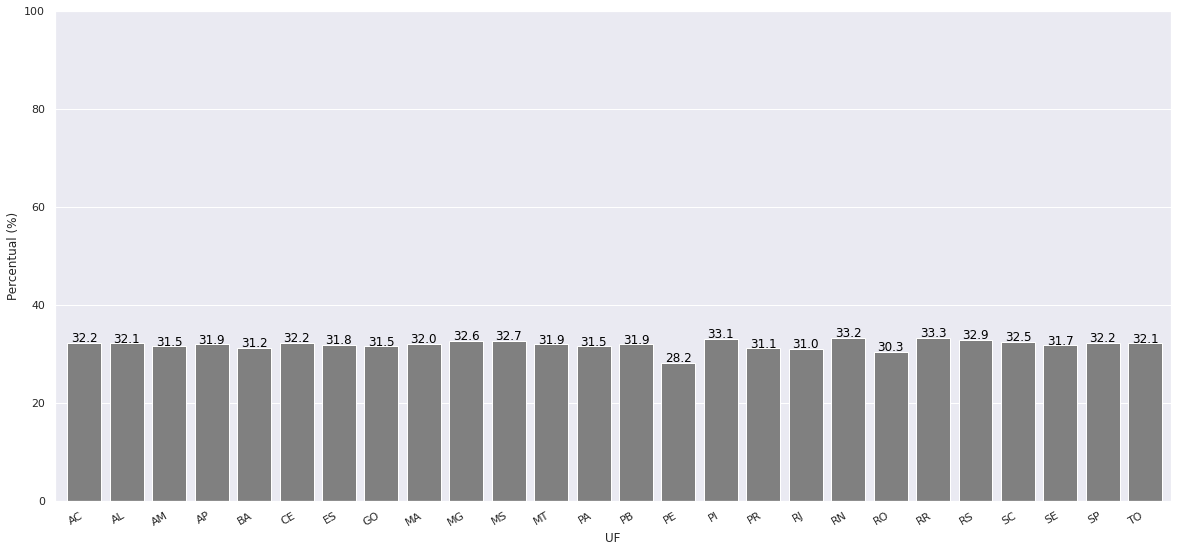

In [348]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
plot1 = sns.barplot(x="SIGLA_UF", y="Percentual", data=b, hue_order=None, estimator=np.mean, ci=95, n_boot=100, units=None, seed=None,color='Grey', palette=None, saturation=0.75)
for i in plot1.patches:
  plot1.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 1), textcoords='offset points')

barWidth = 0.3
plt.xlabel('UF')
plt.ylabel('Percentual (%)')
xmax = 25.6
ymax = 100
eixos = plt.gca()
eixos.set_xlim([-0.7, xmax])
eixos.set_ylim([0, ymax])
plt.gcf().autofmt_xdate()

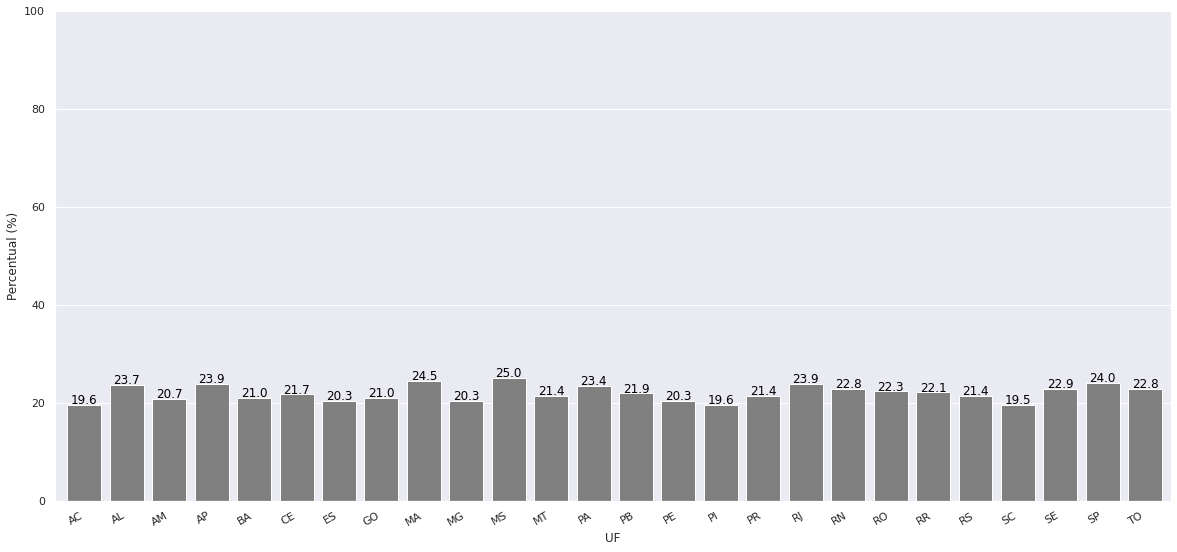

In [338]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
plot = sns.barplot(x="SIGLA_UF", y="Percentual", data=a, hue_order=None, estimator=np.mean, ci=95, n_boot=100, units=None, seed=None,color='Grey', palette=None, saturation=0.75)
for i in plot.patches:
  plot.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 1), textcoords='offset points')

barWidth = 0.3
plt.xlabel('UF')
plt.ylabel('Percentual (%)')
xmax = 25.6
ymax = 100
eixos = plt.gca()
eixos.set_xlim([-0.7, xmax])
eixos.set_ylim([0, ymax])
plt.gcf().autofmt_xdate()


In [285]:
a

,DESCRICAO_SEXO,SIGLA_UF,Candidatas
0,FEMININO,AC,255
1,FEMININO,AL,1254
2,FEMININO,AM,1112
3,FEMININO,AP,296
4,FEMININO,BA,5137
5,FEMININO,CE,2025
6,FEMININO,ES,1201
7,FEMININO,GO,2745
8,FEMININO,MA,3102
9,FEMININO,MG,10473


In [149]:
 #recorte por lista partidária e município
 df1 = ele_08.groupby(['UF', 'ANO_ELEICAO', 'COD_MUN_IBGE', 'SIGLA_PARTIDO', 'DESCRICAO_SEXO'])[['DESCRICAO_SEXO']].count()
 df2 = ele_12.groupby(['UF', 'ANO_ELEICAO', 'COD_MUN_IBGE', 'SIGLA_PARTIDO', 'DESCRICAO_SEXO'])[['DESCRICAO_SEXO']].count()

In [15]:
df1.columns=['CANDIDATOS']
df2.columns=['CANDIDATOS']

In [16]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [18]:
 df_1 = ele_08.groupby(['ANO_ELEICAO','UF', 'COD_MUN_IBGE', 'SIGLA_PARTIDO'],as_index=False)[['DESCRICAO_SEXO']].count()
 df_2 = ele_12.groupby(['ANO_ELEICAO', 'UF', 'COD_MUN_IBGE', 'SIGLA_PARTIDO'],as_index=False)[['DESCRICAO_SEXO']].count()

In [19]:
df_08 = pd.merge(df1, df_1, on=['UF','COD_MUN_IBGE','SIGLA_PARTIDO'])
df_12 = pd.merge(df2, df_2, on=['UF','COD_MUN_IBGE','SIGLA_PARTIDO'])

In [20]:
df_08['Percentual'] = df_08['CANDIDATOS']/df_08['DESCRICAO_SEXO_y']*100
df_12['Percentual'] = df_12['CANDIDATOS']/df_12['DESCRICAO_SEXO_y']*100

In [151]:
#recorte por município e genero apenas
base1 = ele_08.groupby(['ANO_ELEICAO', 'UF', 'COD_MUN_IBGE', 'DESCRICAO_SEXO'])[['DESCRICAO_SEXO']].count()
base2 = ele_12.groupby(['ANO_ELEICAO','UF', 'COD_MUN_IBGE', 'DESCRICAO_SEXO'])[['DESCRICAO_SEXO']].count()

#junção e limpeza
base1.columns=['CANDIDATOS']
base2.columns=['CANDIDATOS']

base1.reset_index(inplace=True)
base2.reset_index(inplace=True)

#agregar
base_1 = ele_08.groupby(['UF', 'COD_MUN_IBGE'],as_index=False)[['DESCRICAO_SEXO']].count()
base_2 = ele_12.groupby(['UF', 'COD_MUN_IBGE'],as_index=False)[['DESCRICAO_SEXO']].count()

 #mergir
base_08 = pd.merge(base1, base_1, on=['UF','COD_MUN_IBGE'])
base_12 = pd.merge(base2, base_2, on=['UF','COD_MUN_IBGE'])

#%
base_08['Percentual'] = base_08['CANDIDATOS']/base_08['DESCRICAO_SEXO_y']*100
base_12['Percentual'] = base_12['CANDIDATOS']/base_12['DESCRICAO_SEXO_y']*100

#renomear
base_08 = base_08.rename(columns={'DESCRICAO_SEXO_x': 'DESCRICAO_SEXO', 'DESCRICAO_SEXO_y': 'Valor total de candidaturas' })
base_12 = base_12.rename(columns={'DESCRICAO_SEXO_x': 'DESCRICAO_SEXO', 'DESCRICAO_SEXO_y': 'Valor total de candidaturas' })


In [159]:
teste = pd.concat([base_08, base_12])

In [206]:
T = teste.groupby(['ANO_ELEICAO','DESCRICAO_SEXO'])[['Percentual']].mean()
T.columns=['% Medio']
T.reset_index(inplace=True)
T.drop([0], axis=0)
t1 = T[T['DESCRICAO_SEXO']=='FEMININO']
t2 = T[T['DESCRICAO_SEXO']=='MASCULINO']
sample = [20.297299, 28.350132]
sample2 = [79.801092, 71.654960]

In [114]:
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [115]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [183]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [194]:
from scipy.stats import wilcoxon

In [204]:
stats.wilcoxon(sample, y=None, zero_method='wilcox', correction=False, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)

In [207]:
def compare_2_groups(sample, sample2, alpha, sample_size):
    stats, p = ttest_ind(sample, sample2)
    print('Statistics=%.3f, p=%.3f' % (stats, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [208]:
sample_size = 15
test = np.random.choice(sample, sample_size)
test2 = np.random.choice(sample2, sample_size)
compare_2_groups(sample, sample2, 0.05, sample_size)

Statistics=-8.975, p=0.012
Different distributions (reject H0)
